In [2]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits


In [3]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke



def load_digits():
    digits = sklearn.datasets.load_digits()
    return digits

In [4]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
print(load_digits())

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [36]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
digits=load_digits()
print(digits.keys())
print(digits.target)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[0 1 2 ... 8 9 8]


In [39]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)


from typing import Tuple
import sklearn


def predict(n_clusters : int, random_state : int, digits) -> Tuple[sklearn.cluster.KMeans,np.ndarray]:
    model = KMeans( n_clusters = n_clusters,random_state=0, n_init="auto")
    return model,model.fit_predict(digits)
print(predict(2,0,digits.data))


(KMeans(n_clusters=2, n_init='auto', random_state=0), array([1, 0, 0, ..., 0, 1, 0]))


In [46]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.
clusters=predict(2,0,digits.data)[1]
model=predict(2,0,digits.data)[0]
print(model.cluster_centers_)

[[ 0.00000000e+00  3.59179019e-01  4.45153934e+00  1.13318130e+01
   1.09270239e+01  3.71265678e+00  6.40820981e-01  4.21892816e-02
   5.70125428e-03  1.73432155e+00  8.54275941e+00  1.35473204e+01
   1.00809578e+01  4.67046750e+00  8.85974914e-01  6.27137970e-02
   4.56100342e-03  2.16647662e+00  9.93728620e+00  9.65906499e+00
   7.39908780e+00  4.55644242e+00  1.11288483e+00  6.61345496e-02
   2.28050171e-03  2.48232611e+00  1.00524515e+01  9.66476625e+00
   9.30330673e+00  4.96123147e+00  1.65792474e+00  3.42075257e-03
   0.00000000e+00  3.15621437e+00  1.02633979e+01  1.24549601e+01
   1.21083238e+01  6.79703535e+00  2.03990878e+00  0.00000000e+00
   1.82440137e-02  2.27023945e+00  9.70581528e+00  1.14253136e+01
   1.01744584e+01  6.37628278e+00  2.56328392e+00  5.01710376e-02
   1.48232611e-02  8.08437856e-01  7.87685291e+00  1.14230331e+01
   1.04070696e+01  6.94412771e+00  3.72633979e+00  2.98745724e-01
   1.14025086e-03  3.66020525e-01  4.77765108e+00  1.11904219e+01
   1.18494

In [ ]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti


In [60]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray
def get_labels(clusters:np.ndarray, digits) -> np.ndarray:
        result = np.empty(shape=clusters.shape)

        for i in digits.target_names:
            mask = (clusters == i)
            result[mask] = mode(digits.target[mask], keepdims=False).mode
        
        labels = result
        return labels
labels=get_labels(clusters,digits)

C:\Users\brnbs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\brnbs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [57]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t
def calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray) -> float:
        accuracy = accuracy_score(digits.target, predicted_labels).round(2)
        return accuracy
print(calc_accuracy(digits,labels))

0.2


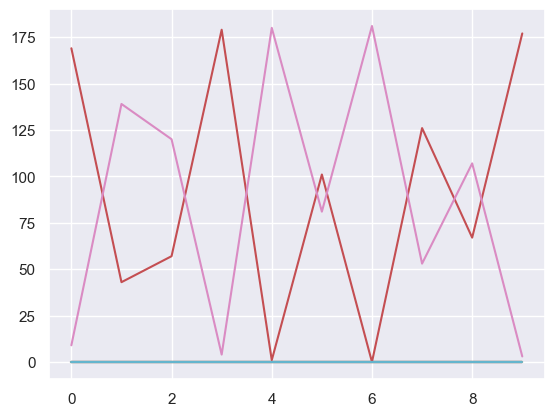

In [59]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével
matrix = confusion_matrix(digits.target, labels, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.plot(matrix)